<a href="https://colab.research.google.com/github/VictorMadu/Fraud-Detection-Challenge/blob/master/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os
from scipy import stats
import pickle
import warnings; warnings.filterwarnings('ignore')

In [0]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [0]:
df_train = pd.read_csv("/content/drive/My Drive/fraud detection/data/train.csv")

In [0]:
test = pd.read_csv("/content/drive/My Drive/fraud detection/data/test.csv")
test.describe()

,current bank amount,last bank amount,time taken (seconds),most recent bank amount,age
count,4507.000000,4.507000e+03,4507.000000,4507.000000,4507.000000
mean,49991.463945,7.526831e+05,2517.641669,245862.386510,54.800976
std,29077.175736,4.351322e+05,1442.939815,144457.063048,14.529433
min,7.000000,3.330000e+02,4.000000,28.000000,30.000000
25%,24478.500000,3.672205e+05,1271.500000,118544.500000,42.000000
50%,49959.000000,7.572590e+05,2508.000000,243979.000000,55.000000
75%,75675.500000,1.124272e+06,3760.500000,369118.500000,67.000000
max,99996.000000,1.499122e+06,4999.000000,499641.000000,79.000000


In [0]:
df_train.head()

,id,transaction time,current bank amount,last bank amount,time taken (seconds),most recent bank amount,account type,marital_status,age,occupation,credit card type,account source verification,transaction source method,account destination verification,fradulent
0,acus0,2016-10-05T01:44:58,43671,1151263,2299,348764,saving,married,46,musician,master,True,False,True,0
1,acus1,2015-01-14T15:05:07,7442,1062843,4553,225114,current,single,64,accounting,master,True,False,False,0
2,acus2,2016-10-28T13:44:58,40102,48042,1493,420486,current,married,41,farmer,master,True,True,True,0
3,acus3,2016-11-20T15:05:32,61024,1441746,544,239663,current,unknown,66,clergy,master,True,True,True,0
4,acus4,2015-09-01T16:11:57,22867,510656,4581,432337,current,married,78,accounting,verve,False,False,True,1


In [0]:
test.head()

,id,transaction time,current bank amount,last bank amount,time taken (seconds),most recent bank amount,account type,marital_status,age,occupation,credit card type,account source verification,transaction source method,account destination verification
0,bcus2993,2016-06-28T12:51:43,88677,1059697,3033,29964,current,unknown,78,accounting,verve,True,True,False
1,bcus2994,2015-12-16T18:04:03,85737,434908,3025,354835,current,single,38,farmer,master,True,False,False
2,bcus2995,2016-10-15T04:06:55,14611,1287631,2414,395445,current,unknown,47,banking,master,True,False,False
3,bcus2996,2014-03-15T04:40:45,53130,61604,1228,204872,current,single,74,clergy,master,False,False,True
4,bcus2997,2015-05-25T05:09:33,20643,1143031,1031,207262,current,married,72,lawyer,master,True,False,True


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 15 columns):
id                                  10493 non-null object
transaction time                    10493 non-null object
current bank amount                 10493 non-null int64
last bank amount                    10493 non-null int64
time taken (seconds)                10493 non-null int64
most recent bank amount             10493 non-null int64
account type                        10493 non-null object
marital_status                      10493 non-null object
age                                 10493 non-null int64
occupation                          10493 non-null object
credit card type                    10493 non-null object
account source verification         10493 non-null bool
transaction source method           10493 non-null bool
account destination verification    10493 non-null bool
fradulent                           10493 non-null int64
dtypes: bool(3), int64(6), object

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 14 columns):
id                                  4507 non-null object
transaction time                    4507 non-null object
current bank amount                 4507 non-null int64
last bank amount                    4507 non-null int64
time taken (seconds)                4507 non-null int64
most recent bank amount             4507 non-null int64
account type                        4507 non-null object
marital_status                      4507 non-null object
age                                 4507 non-null int64
occupation                          4507 non-null object
credit card type                    4507 non-null object
account source verification         4507 non-null bool
transaction source method           4507 non-null bool
account destination verification    4507 non-null bool
dtypes: bool(3), int64(5), object(6)
memory usage: 400.6+ KB


In [0]:
df = pd.concat([df_train, test])

In [0]:
df.shape

(15000, 15)

### Data Preparation

In [0]:
df.describe()

,age,current bank amount,fradulent,last bank amount,most recent bank amount,time taken (seconds)
count,15000.000000,15000.000000,10493.000000,1.500000e+04,15000.000000,15000.000000
mean,54.694667,49998.823533,0.276661,7.502992e+05,249294.493667,2511.336067
std,14.404479,28799.884329,0.447369,4.340549e+05,144251.748915,1435.826224
min,30.000000,1.000000,0.000000,8.000000e+00,28.000000,4.000000
25%,42.000000,25020.000000,0.000000,3.758890e+05,124676.500000,1279.000000
50%,55.000000,50062.500000,0.000000,7.520805e+05,250117.500000,2518.000000
75%,67.000000,74888.500000,1.000000,1.125724e+06,374667.000000,3727.000000
max,79.000000,99996.000000,1.000000,1.499877e+06,499926.000000,4999.000000


In [0]:
df.describe(include='O')

,account type,credit card type,id,marital_status,occupation,transaction time
count,15000,15000,15000,15000,15000,15000
unique,2,2,15000,3,8,14999
top,current,master,bcus2945,married,clergy,2015-01-18T19:41:37
freq,12791,11225,1,7499,3750,2


In [0]:
df['transaction time'] = pd.to_datetime(df['transaction time'])
df['is_busday'] = [np.is_busday(x.astype('datetime64[D]')).astype('int').astype('str') for x in df['transaction time'].values]

In [0]:
df['year'] = df['transaction time'].dt.year.astype('category')
df['quarter'] = df['transaction time'].dt.quarter.astype('category')
df['month'] = df['transaction time'].dt.month.astype('category')
df['week'] = df['transaction time'].dt.week.astype('category')
df['day'] = df['transaction time'].dt.day.astype('category')
df['hour'] = df['transaction time'].dt.hour.astype('category')
df['minute'] = df['transaction time'].dt.minute.astype('category')
df['second'] = df['transaction time'].dt.second.astype('category')
df['weekday'] = df['transaction time'].dt.weekday.astype('category')
df['time'] = df['transaction time'].dt.time.astype('category')
df['no_days_in_month'] = df['transaction time'].dt.days_in_month.astype('category')

def map_hours(x):
    if x in [0,1,2,3, 4]:
        return 'early morning'
    if x in [5,6,7,8,9,10,11,12]:
        return 'morning'
    elif x in [13,14,15,16]:
        return 'afternoon'
    elif x in [17, 18, 19, 20, 21]:
        return 'evening'
    else:
      return 'late evening'
    
df['period_of_day'] = df['hour'].map(map_hours)

def age_grouping(x):
  if x<35:
    return '1'
  elif x<40:
    return '2'
  elif x<45:
    return '3'
  elif x<50:
    return '4'
  elif x<55:
    return '5'
  elif x<60:
    return '6'
  elif x<65:
    return '7'
  elif x<70:
    return '8'
  elif x<75:
    return '9'
  else:
    return '10'
df['age_group'] = df['age'].map(age_grouping).astype('category')

In [0]:
df['diff_current_and_last_amount'] = df['current bank amount'] - df['last bank amount']
df['diff_recent_and_last_amount'] = df['most recent bank amount'] - df['last bank amount']
df['diff_recent_and_current_amount'] = df['most recent bank amount'] - df['current bank amount']

In [0]:
df['account source verification'] = df['account source verification'].astype('int').astype('str')
df['transaction source method'] = df['transaction source method']. astype('int').astype('str')
df['account destination verification'] = df['account destination verification'].astype('int').astype('str')
df['fradulent'] = df['fradulent'].astype('category')

In [0]:
df.columns

Index(['account destination verification', 'account source verification',
       'account type', 'age', 'credit card type', 'current bank amount',
       'fradulent', 'id', 'last bank amount', 'marital_status',
       'most recent bank amount', 'occupation', 'time taken (seconds)',
       'transaction source method', 'transaction time', 'is_busday', 'year',
       'quarter', 'month', 'week', 'day', 'hour', 'minute', 'second',
       'weekday', 'time', 'no_days_in_month', 'period_of_day', 'age_group',
       'diff_current_and_last_amount', 'diff_recent_and_last_amount',
       'diff_recent_and_current_amount'],
      dtype='object')

In [0]:
# df.columns = ['account_destination_verification', 'account_source_verification',
#        'account_type', 'age', 'credit_card_type', 'current_bank_amount',
#        'fradulent', 'id', 'last_bank_amount', 'marital_status',
#        'most_recent_bank_amount', 'occupation', 'time_taken_(seconds)',
#        'transaction_source_method', 'transaction time', 'is_busday', 'year',
#        'quarter', 'month', 'week', 'day', 'hour', 'minute', 'second',
#        'weekday', 'time', 'no_days_in_month', 'period_of_day', 'age_group',
#        'diff_current_and_last_amount', 'diff_recent_and_last_amount',
#        'diff_recent_and_current_amount']

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4506
Data columns (total 32 columns):
account destination verification    15000 non-null object
account source verification         15000 non-null object
account type                        15000 non-null object
age                                 15000 non-null int64
credit card type                    15000 non-null object
current bank amount                 15000 non-null int64
fradulent                           10493 non-null category
id                                  15000 non-null object
last bank amount                    15000 non-null int64
marital_status                      15000 non-null object
most recent bank amount             15000 non-null int64
occupation                          15000 non-null object
time taken (seconds)                15000 non-null int64
transaction source method           15000 non-null object
transaction time                    15000 non-null datetime64[ns]
is_busday        

### Univariate analysis

In [0]:
df.describe(include='O')

In [0]:
df.describe(include='O')

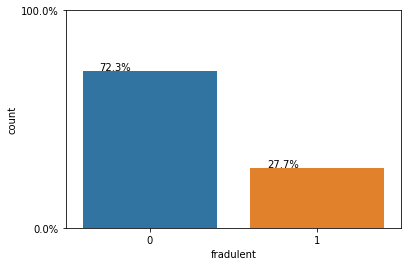

In [0]:
def class_distribution_plot(data, y):
  total = len(data)*1.
  ax = sns.countplot(x=y, data=data)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
  ax.yaxis.set_ticks(np.linspace(0, total, len(np.unique(data[y]))))

  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  plt.show()


class_distribution_plot(df, 'fradulent')

In [0]:
def distribution_plot(data, y, size=5):
    """
    Plots the distribution plot of each numeric feature of the data passed as input with KDE.
    Takes a pandas dataframe, label and args* as input 
    """
    features = list(data.select_dtypes([np.number]).columns)
    features.remove(y)
    for idx, feature in enumerate(features):
        fg = sns.FacetGrid(data, hue='fradulent', size=size)
        fg.map(sns.distplot, feature).add_legend()
        plt.show()
        

def cdf(data, y, figsize=(20,5), bins=10, density=True):
    """
    Plots the cdf and pdf of each numeric feature of the pandas dataframe.
    Takes a pandas dataframe, label and args* as input 
    """
    features = list(data.select_dtypes([np.number]).columns)
    features.remove(y)
    for idx, feature in enumerate(features):
        print("********* "+feature+" *********")
        counts, bin_edges = np.histogram(data[feature], bins=bins, density=density)
        print("Bin Edges: {}".format(bin_edges))
        pdf = counts/sum(counts)
        print("PDF: {}".format(pdf))
        cdf = np.cumsum(pdf)
        print("CDF: {}".format(cdf))
        plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
        plt.xlabel(feature)
        plt.show()
        

        
def boxplot(data, y):
    """
    boxplot of each numeric feature of the data.
    Takes a pandas dataframe and label as input 
    """
    features = list(data.select_dtypes([np.number]).columns)
    features.remove(y)
#     fig, axes = plt.subplots(np.int(np.ceil(len(features)/3)), 3, figsize=(25, 50))
#     axes = axes.flatten()
    for idx, feature in enumerate(data[features]):
        sns.boxplot( x=y, y=feature, data=data)
        plt.show() 

def violinplot(data, y):
    """
    violinplot of each numeric feature of the data.
    Takes a pandas dataframe and label as input 
    """
    features = list(data.select_dtypes([np.number]).columns)
    features.remove(y)
#     fig, axes = plt.subplots(np.int(np.ceil(len(features)/3)), 3, figsize=(50, 50))
#     axes = axes.flatten()
    for idx, feature in enumerate(data[features]):
        sns.violinplot( x=y, y=feature, data=data)
        plt.show() 


def histogram(data, y):
  """
    histogram of each numeric feature of the data.
    Takes a pandas dataframe and label as input 
  """
  
  features = list(data.select_dtypes(['object']).columns)
  for feature in features:
    sns.catplot(x=feature, hue=y, kind="count",
            palette="YlOrRd", edgecolor=".8",
            data=data, size=10)
    plt.plot()
  


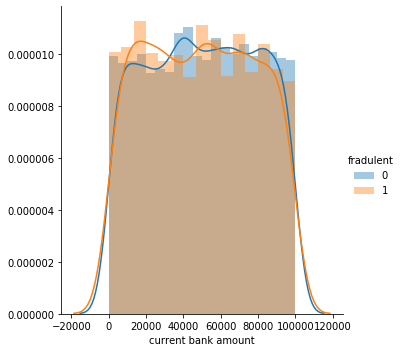

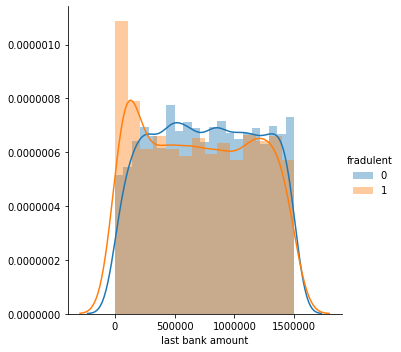

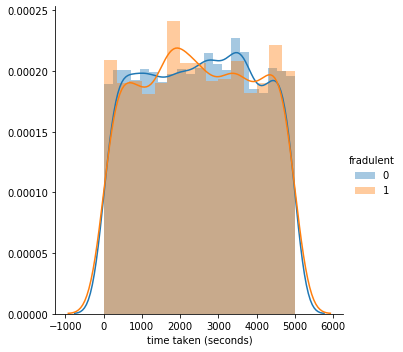

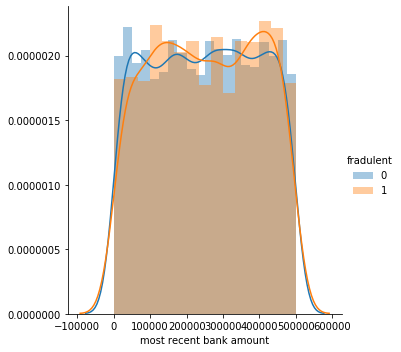

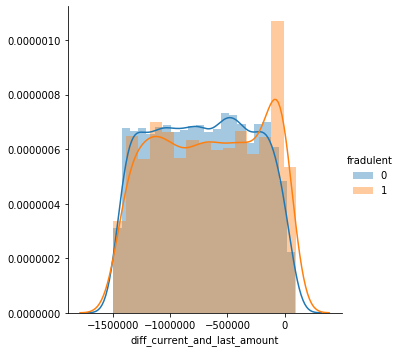

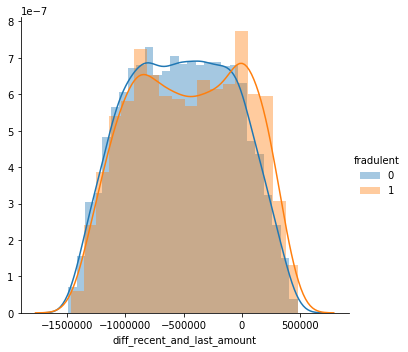

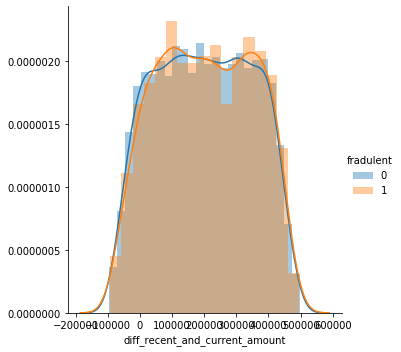

In [0]:
distribution_plot(df, 'fradulent')

********* current bank amount *********
Bin Edges: [1.00000e+00 9.99980e+03 1.99986e+04 2.99974e+04 3.99962e+04 4.99950e+04
 5.99938e+04 6.99926e+04 7.99914e+04 8.99902e+04 9.99890e+04]
PDF: [0.09882779 0.10168684 0.09596874 0.0993996  0.10254455 0.10378347
 0.09978081 0.10073382 0.10025731 0.09701706]
CDF: [0.09882779 0.20051463 0.29648337 0.39588297 0.49842752 0.602211
 0.7019918  0.80272563 0.90298294 1.        ]


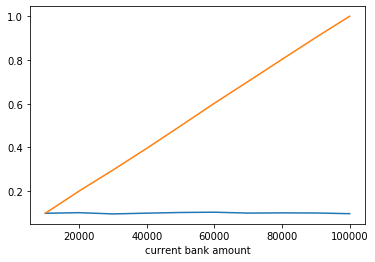

********* last bank amount *********
Bin Edges: [8.0000000e+00 1.4999490e+05 2.9998180e+05 4.4996870e+05 5.9995560e+05
 7.4994250e+05 8.9992940e+05 1.0499163e+06 1.1999032e+06 1.3498901e+06
 1.4998770e+06]
PDF: [0.10216335 0.09997141 0.09701706 0.10425998 0.09739827 0.10321166
 0.09596874 0.10035262 0.09863719 0.10101973]
CDF: [0.10216335 0.20213476 0.29915182 0.4034118  0.50081006 0.60402173
 0.69999047 0.80034309 0.89898027 1.        ]


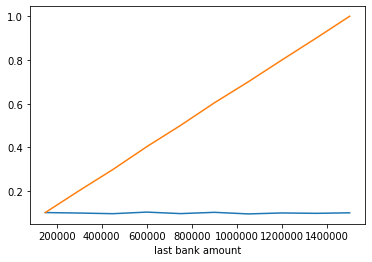

********* time taken (seconds) *********
Bin Edges: [4.0000e+00 5.0350e+02 1.0030e+03 1.5025e+03 2.0020e+03 2.5015e+03
 3.0010e+03 3.5005e+03 4.0000e+03 4.4995e+03 4.9990e+03]
PDF: [0.0994949  0.09758887 0.09558753 0.10283046 0.10016201 0.10406938
 0.10445059 0.10025731 0.09587344 0.0996855 ]
CDF: [0.0994949  0.19708377 0.2926713  0.39550176 0.49566378 0.59973316
 0.70418374 0.80444106 0.9003145  1.        ]


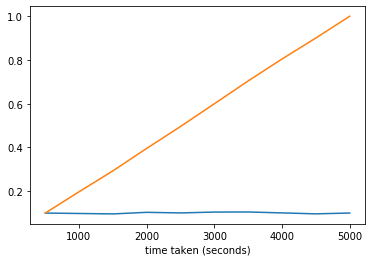

********* most recent bank amount *********
Bin Edges: [3.400000e+01 5.002320e+04 1.000124e+05 1.500016e+05 1.999908e+05
 2.499800e+05 2.999692e+05 3.499584e+05 3.999476e+05 4.499368e+05
 4.999260e+05]
PDF: [0.10225865 0.09615934 0.09701706 0.10368817 0.09482512 0.10368817
 0.09978081 0.09911369 0.10483179 0.09863719]
CDF: [0.10225865 0.19841799 0.29543505 0.39912323 0.49394835 0.59763652
 0.69741733 0.79653102 0.90136281 1.        ]


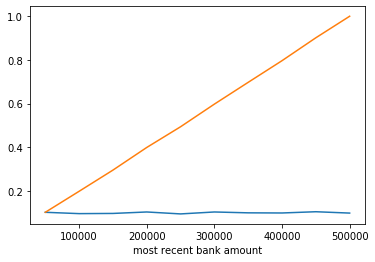

********* diff_current_and_last_amount *********
Bin Edges: [-1494270.  -1335283.3 -1176296.6 -1017309.9  -858323.2  -699336.5
  -540349.8  -381363.1  -222376.4   -63389.7    95597. ]
PDF: [0.07776613 0.10283046 0.10750024 0.10435528 0.10492709 0.1053083
 0.11264653 0.10111503 0.10873916 0.07481178]
CDF: [0.07776613 0.18059659 0.28809683 0.39245211 0.49737921 0.60268751
 0.71533403 0.81644906 0.92518822 1.        ]


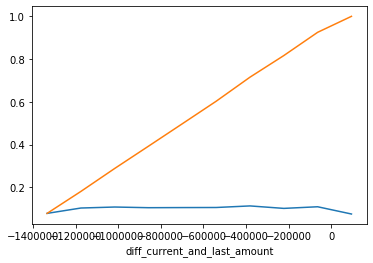

********* diff_recent_and_last_amount *********
Bin Edges: [-1489198.  -1291899.1 -1094600.2  -897301.3  -700002.4  -502703.5
  -305404.6  -108105.7    89193.2   286492.1   483791. ]
PDF: [0.0289717  0.08033927 0.12427333 0.13408939 0.12941961 0.13132565
 0.13037263 0.12741828 0.08443724 0.0293529 ]
CDF: [0.0289717  0.10931097 0.23358429 0.36767369 0.4970933  0.62841895
 0.75879158 0.88620985 0.9706471  1.        ]


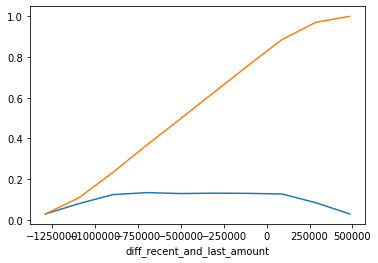

********* diff_recent_and_current_amount *********
Bin Edges: [-96346. -37035.  22276.  81587. 140898. 200209. 259520. 318831. 378142.
 437453. 496764.]
PDF: [0.0411703  0.10063852 0.11550558 0.12093777 0.12217669 0.11960355
 0.11769751 0.11607738 0.10997808 0.03621462]
CDF: [0.0411703  0.14180882 0.2573144  0.37825217 0.50042886 0.6200324
 0.73772992 0.8538073  0.96378538 1.        ]


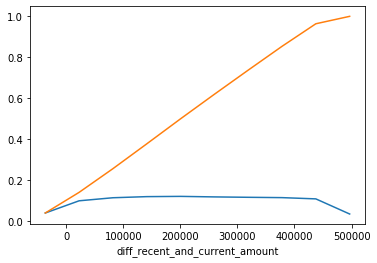

In [0]:
cdf(df, 'fradulent')

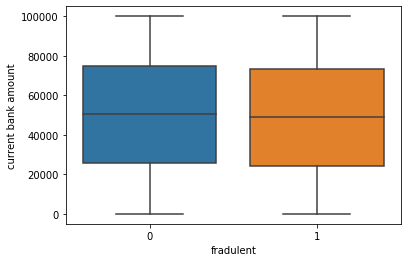

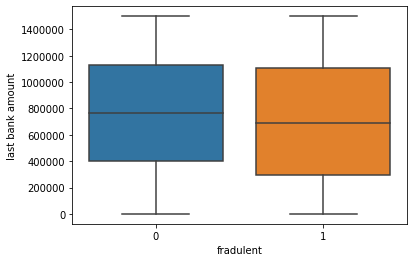

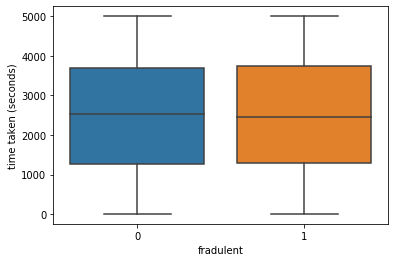

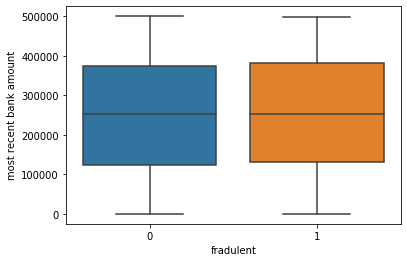

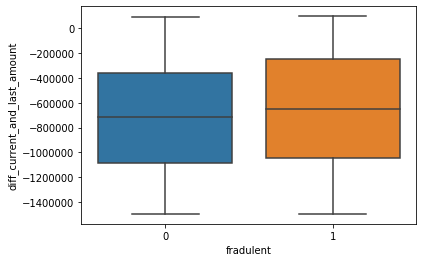

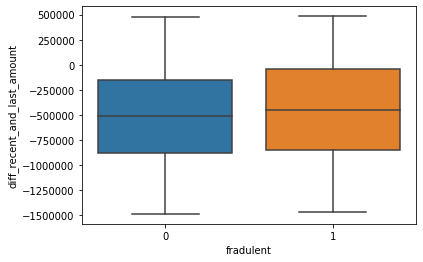

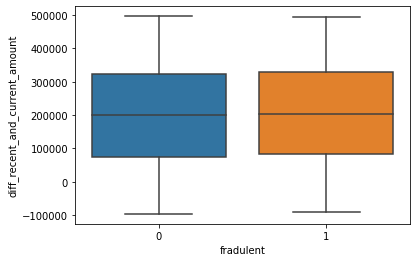

In [0]:
boxplot(df, 'fradulent')

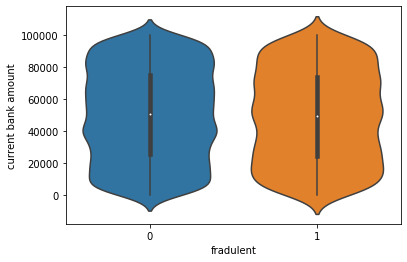

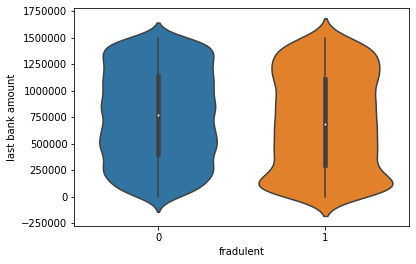

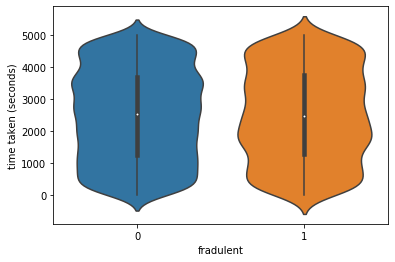

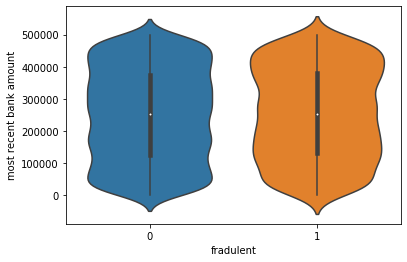

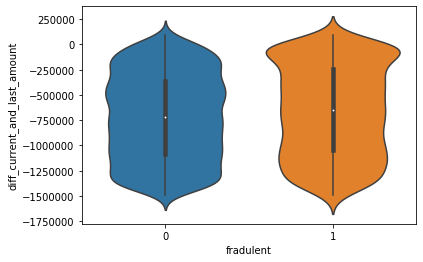

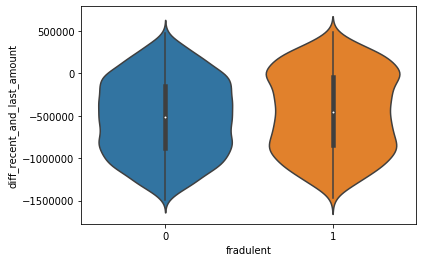

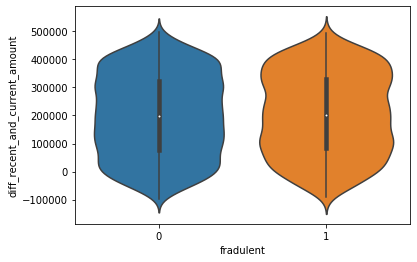

In [0]:
violinplot(df, 'fradulent')

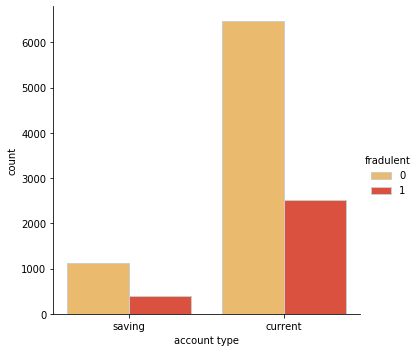

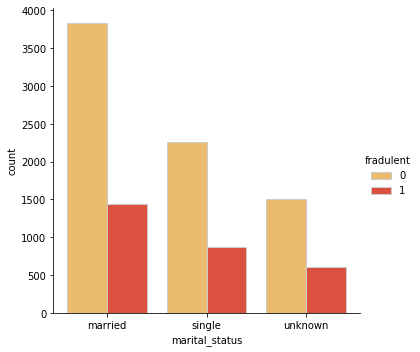

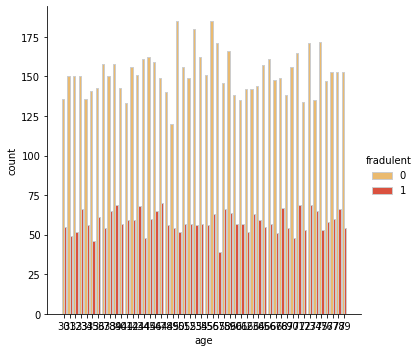

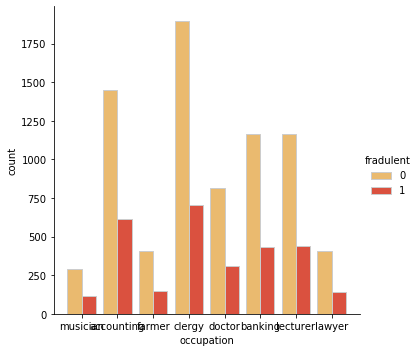

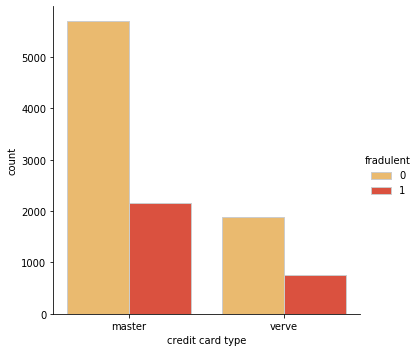

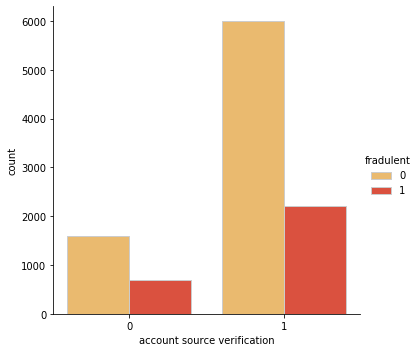

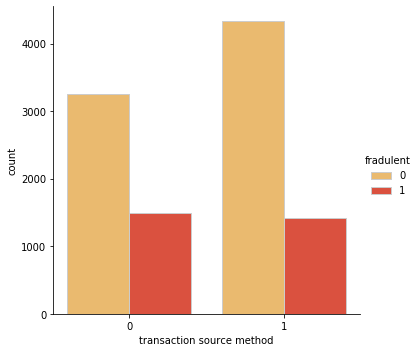

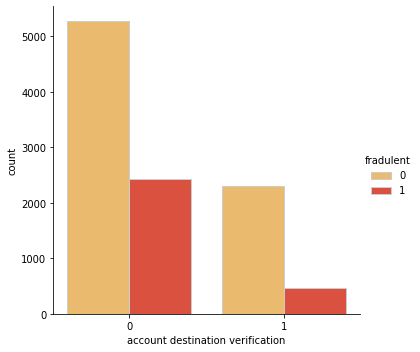

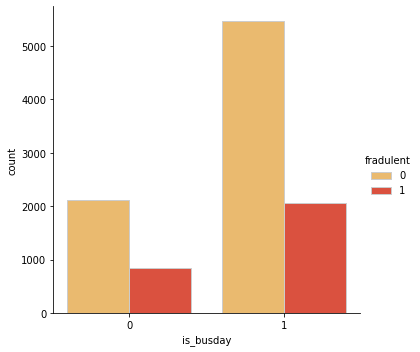

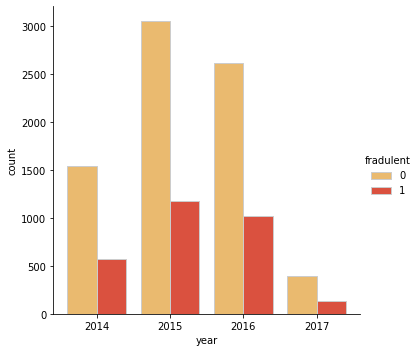

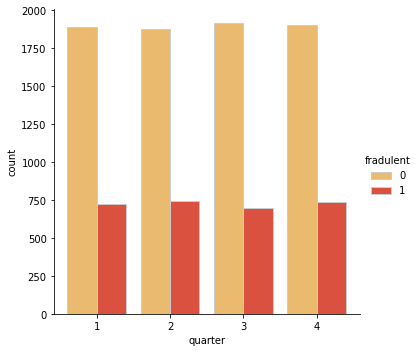

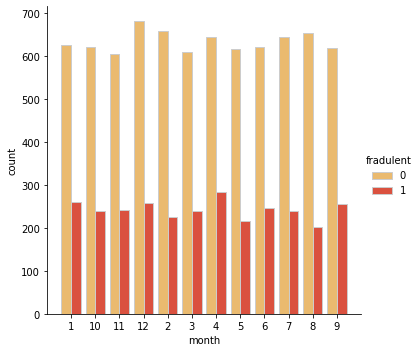

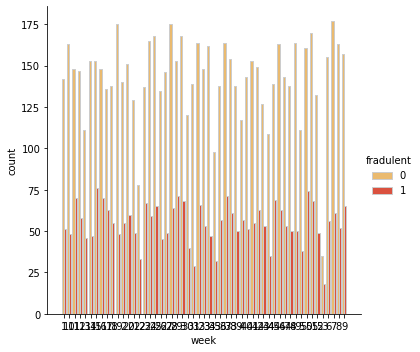

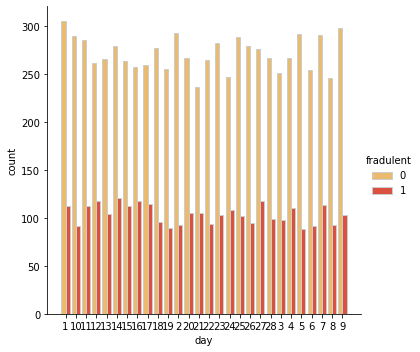

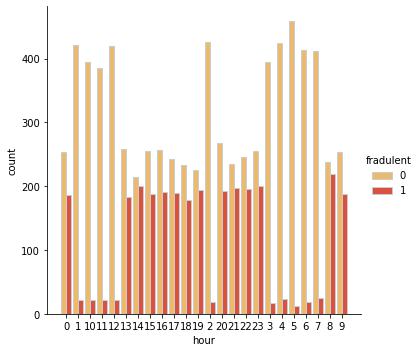

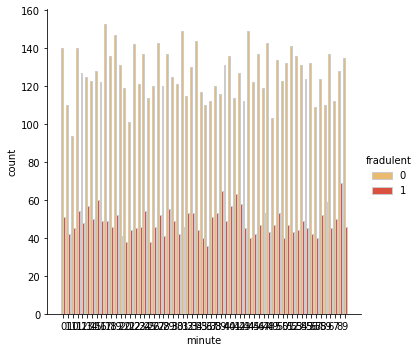

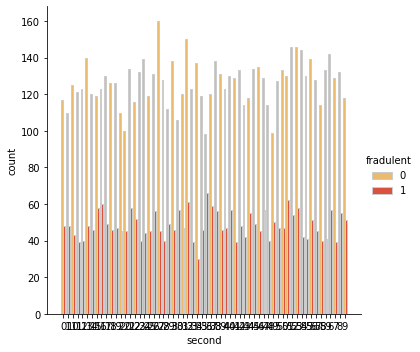

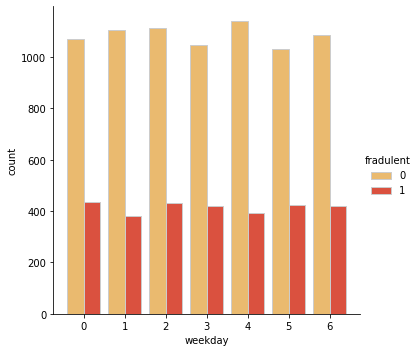

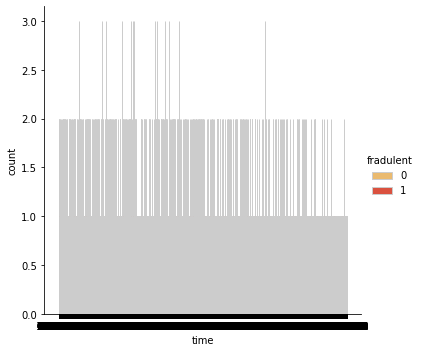

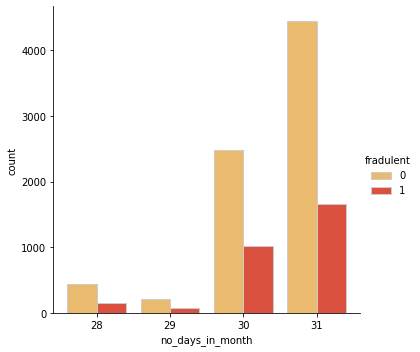

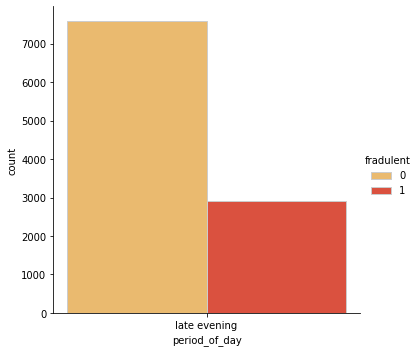

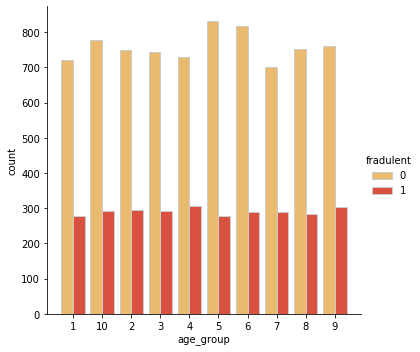

In [0]:
histogram(df, 'fradulent')

In [0]:
df.describe()

,current bank amount,last bank amount,time taken (seconds),most recent bank amount,diff_current_and_last_amount,diff_recent_and_last_amount,diff_recent_and_current_amount,fradulent
count,10493.000000,1.049300e+04,10493.000000,10493.000000,1.049300e+04,1.049300e+04,10493.000000,10493.000000
mean,50001.984656,7.492752e+05,2508.627657,250768.667588,-6.992732e+05,-4.985066e+05,200766.682931,0.276661
std,28681.350627,4.336081e+05,1432.820357,144145.272817,4.341585e+05,4.561313e+05,146843.485025,0.447369
min,1.000000,8.000000e+00,4.000000,34.000000,-1.494270e+06,-1.489198e+06,-96346.000000,0.000000
25%,25243.000000,3.787840e+05,1282.000000,126333.000000,-1.073535e+06,-8.713160e+05,77565.000000,0.000000
50%,50093.000000,7.485950e+05,2520.000000,253174.000000,-6.954210e+05,-4.978850e+05,200138.000000,0.000000
75%,74539.000000,1.126013e+06,3710.000000,376461.000000,-3.294870e+05,-1.202590e+05,325988.000000,1.000000
max,99989.000000,1.499877e+06,4999.000000,499926.000000,9.559700e+04,4.837910e+05,496764.000000,1.000000


In [0]:
df.describe(include='O')

,account type,marital_status,age,occupation,credit card type,account source verification,transaction source method,account destination verification,is_busday,year,quarter,month,week,day,hour,minute,second,weekday,time,no_days_in_month,period_of_day,age_group
count,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493,10493
unique,2,3,50,8,2,2,2,2,2,4,4,12,53,28,24,60,60,7,9915,4,1,10
top,current,married,56,clergy,master,1,1,0,1,2015,4,12,28,1,5,17,32,2,04:44:46,31,late evening,5
freq,8984,5270,248,2601,7855,8206,5751,7710,7531,4227,2642,938,239,417,471,202,211,1543,3,6098,10493,1111


### Multivariate Analysis

In [0]:
def pairplot(data):
    """
    pairplot of each numeric feature of the data
    """
    sns.pairplot(data, hue='fradulent', size=10)
    plt.savefig('multivariate analysis.png')
    plt.show()

In [0]:
pairplot(df)

### Further Feature Engineering

In [0]:
age_group
occupation
credit card type
account source verification
is_busday
year
quarter
month
week
day
hour
weekday
no_days_in_month


current bank amount               
last bank amount                 
time taken (seconds)               
most recent bank amount            
age                                
account source verification        
transaction source method         
account destination verification    


mean, max, min, skew, kurt, std, sum, std, count


ratio of current bank account and last bank amount, time taken and current bank amount, time taken and last bank amount, time taken and most recent bank amount, age, hour,quarter, month, day, weekday, is_busday, year, no_of days

In [0]:
feats = np.array(['mean', 'max', 'min', 'range', 'sum', 'skew', 'kurtosis', 'std', 'count'])
for i in np.array(['account type', 'account source verification', 'transaction source method', 'account destination verification', 'credit card type', 'age_group', 'marital_status', 'occupation', 'is_busday', 'year', 'quarter', 'month', 'week', 'day', 'hour', 'weekday', 'no_days_in_month']):
  for j in np.array(['current bank amount', 'last bank amount', 'time taken (seconds)', 'most recent bank amount', 'age', 'diff_current_and_last_amount', 'diff_recent_and_last_amount', 'diff_cur_and_current_amount']):
    for ind, k in enumerate(np.array([np.mean, np.max, np.min, lambda x:max(x)-min(x), np.sum, stats.skew, stats.kurtosis, np.std, 'count'])):
      df[i+'_'+j+'_'+feats[ind]] = df.groupby(i)[j].transform(k)

In [0]:
for i in ['time taken (seconds)']:
  df['current bank amount/'+str(i)] =  df['current bank amount']/df[i]
  df['last bank amount/time'+str(i)] =  df['last bank amount']/df[i]
  df['most recent bank amount/'+str(i)] =  df['most recent bank amount']/df[i]
  df['diff_current_and_last_amount/'+str(i)] = df['diff_current_and_last_amount']/df[i]
  df['diff_recent_and_last_amount/'+str(i)] = df['diff_recent_and_last_amount']/df[i]
  df['diff_recent_and_current_amount/'+str(i)] = df['diff_recent_and_current_amount']


In [0]:
len(df.columns)

803

In [0]:
df.columns.tolist()

['account destination verification',
 'account source verification',
 'account type',
 'age',
 'credit card type',
 'current bank amount',
 'fradulent',
 'id',
 'last bank amount',
 'marital_status',
 'most recent bank amount',
 'occupation',
 'time taken (seconds)',
 'transaction source method',
 'transaction time',
 'is_busday',
 'year',
 'quarter',
 'month',
 'week',
 'day',
 'hour',
 'minute',
 'second',
 'weekday',
 'time',
 'no_days_in_month',
 'period_of_day',
 'age_group',
 'diff_current_and_last_amount',
 'diff_recent_and_last_amount',
 'diff_recent_and_current_amount',
 'account type_current bank amount_mean',
 'account type_current bank amount_max',
 'account type_current bank amount_min',
 'account type_current bank amount_range',
 'account type_current bank amount_sum',
 'account type_current bank amount_skew',
 'account type_current bank amount_kurtosis',
 'account type_current bank amount_std',
 'account type_current bank amount_count',
 'account type_last bank amount_me

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4506
Columns: 803 entries, account destination verification to diff_recent_and_current_amount/time taken (seconds)
dtypes: category(13), datetime64[ns](1), float64(345), int64(434), object(10)
memory usage: 91.5+ MB


In [0]:
df['age'] = df['age'].astype('category')
df['fradulent'] = df['fradulent'].astype('int')

In [0]:
test_processed = df[df_train.shape[0]:]
test_processed.drop(['fradulent', 'time', 'period_of_day', 'transaction time'], axis=1).reset_index(drop=True).to_csv('/content/drive/My Drive/fraud detection/data/processed_test.csv', index=False)

In [0]:
test_processed.shape[0]

4507

In [0]:
df.shape[0]

15000

In [0]:
train_processed = df[:len(df_train)]
train_processed.drop(['time', 'period_of_day', 'transaction time'], axis=1).to_csv('/content/drive/My Drive/fraud detection/data/processed_train.csv', index=False)

In [0]:
df.shape[0]

15000

In [0]:
train_processed.shape

(10493, 803)

### Machine Learning

**bold text** Hyperparameter tuning

In [0]:
df = pd.read_csv("/content/drive/My Drive/fraud detection/data/processed_train.csv")
df.head(5)

,account destination verification,account source verification,account type,age,credit card type,current bank amount,fradulent,id,last bank amount,marital_status,most recent bank amount,occupation,time taken (seconds),transaction source method,transaction time,is_busday,year,quarter,month,week,day,hour,minute,second,weekday,time,no_days_in_month,period_of_day,age_group,diff_current_and_last_amount,diff_recent_and_last_amount,diff_recent_and_current_amount,age_group_current bank amount_mean,age_group_current bank amount_max,age_group_current bank amount_min,age_group_current bank amount_range,age_group_current bank amount_skew,age_group_current bank amount_kurt,age_group_current bank amount_std,age_group_last bank amount_mean,age_group_last bank amount_max,age_group_last bank amount_min,age_group_last bank amount_range,age_group_last bank amount_skew,age_group_last bank amount_kurt,age_group_last bank amount_std,age_group_time taken (seconds)_mean,age_group_time taken (seconds)_max,age_group_time taken (seconds)_min,age_group_time taken (seconds)_range,age_group_time taken (seconds)_skew,age_group_time taken (seconds)_kurt,age_group_time taken (seconds)_std,age_group_most recent bank amount_mean,age_group_most recent bank amount_max,age_group_most recent bank amount_min,age_group_most recent bank amount_range,age_group_most recent bank amount_skew,age_group_most recent bank amount_kurt,age_group_most recent bank amount_std,age_group_age_mean,age_group_age_max,age_group_age_min,age_group_age_range,age_group_age_skew,age_group_age_kurt,age_group_age_std,age_group_diff_recent_and_last_amount_mean,age_group_diff_recent_and_last_amount_max,age_group_diff_recent_and_last_amount_min,age_group_diff_recent_and_last_amount_range,age_group_diff_recent_and_last_amount_skew,age_group_diff_recent_and_last_amount_kurt,age_group_diff_recent_and_last_amount_std,age_group_diff_current_and_last_amount_mean,age_group_diff_current_and_last_amount_max,age_group_diff_current_and_last_amount_min,age_group_diff_current_and_last_amount_range,age_group_diff_current_and_last_amount_skew,age_group_diff_current_and_last_amount_kurt,age_group_diff_current_and_last_amount_std,age_group_diff_recent_and_current_amount_mean,age_group_diff_recent_and_current_amount_max,age_group_diff_recent_and_current_amount_min,age_group_diff_recent_and_current_amount_range,age_group_diff_recent_and_current_amount_skew,age_group_diff_recent_and_current_amount_kurt,age_group_diff_recent_and_current_amount_std,occupation_current bank amount_mean,occupation_current bank amount_max,occupation_current bank amount_min,occupation_current bank amount_range,occupation_current bank amount_skew,occupation_current bank amount_kurt,occupation_current bank amount_std,occupation_last bank amount_mean,occupation_last bank amount_max,occupation_last bank amount_min,occupation_last bank amount_range,occupation_last bank amount_skew,occupation_last bank amount_kurt,occupation_last bank amount_std,occupation_time taken (seconds)_mean,occupation_time taken (seconds)_max,occupation_time taken (seconds)_min,occupation_time taken (seconds)_range,occupation_time taken (seconds)_skew,occupation_time taken (seconds)_kurt,occupation_time taken (seconds)_std,occupation_most recent bank amount_mean,occupation_most recent bank amount_max,occupation_most recent bank amount_min,occupation_most recent bank amount_range,occupation_most recent bank amount_skew,occupation_most recent bank amount_kurt,occupation_most recent bank amount_std,occupation_age_mean,occupation_age_max,occupation_age_min,occupation_age_range,occupation_age_skew,occupation_age_kurt,occupation_age_std,occupation_diff_recent_and_last_amount_mean,occupation_diff_recent_and_last_amount_max,occupation_diff_recent_and_last_amount_min,occupation_diff_recent_and_last_amount_range,occupation_diff_recent_and_last_amount_skew,occupation_diff_recent_and_last_amount_kurt,occupation_diff_recent_and_last_amount_std,occupation_diff_current_and_last_amount_m

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

X = df.drop(['fradulent', 'time', 'period_of_day'], axis=1)
Y = df['fradulent']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder

num_transform = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False))
])


cat_transform = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

cat_transform2 = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])


In [0]:
from sklearn.compose import ColumnTransformer

num_feat = X.select_dtypes(include=[np.number]).columns
cat_feat = X.select_dtypes(include='category').columns

preprocesser = ColumnTransformer(transformers=[
    ('num', num_transform, num_feat),
    ('cat', cat_transform, cat_feat)
])

# preprocesser2 =  ColumnTransformer(transformers=[
#     ('num', num_transform2, num_feat),
#     ('cat', cat_transform2, cat_feat)
# ])


In [0]:
from sklearn.linear_model import LogisticRegression

lr_pipe = Pipeline(steps=[
    ('preprocesser', preprocesser),
    ('model', LogisticRegression(class_weight='balanced'))
])

grid_params = { 
            'model__penalty': ['l1', 'l2', 'elasticnet'],
            'model__l1_ratio': uniform(0.00, 1.00),
            'model__C': uniform(0.00, 1.00),
            'preprocesser__num__poly__degree': randint(1, 5)
}

clf = RandomizedSearchCV(lr_pipe, grid_params, n_iter=20, cv=5, scoring='roc_auc')
lr_roc_auc = clf.fit(X[:102], Y)
print('Best score:', lr_roc_auc.best_score_)
print('Best Params:\n', lr_roc_auc.best_params_)

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = lr_roc_auc.predict(X_test)
print('accuarcy score', accuracy_score(Y_test, y_pred))
print('roc auc score', roc_auc_score(Y_test, y_pred))

In [0]:
pickle.dump(lr_roc_auc, open(f"/content/drive/My Drive/fraud detection/log_reg/log_reg{i=1}", "wb"))

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1520
           1       0.00      0.00      0.00       579

    accuracy                           0.72      2099
   macro avg       0.36      0.50      0.42      2099
weighted avg       0.52      0.72      0.61      2099



In [0]:
def plot_confusion_matrix(y_test, y_pred):
  C = confusion_matrix(y_test, y_pred)
  print('Number of misclassified points', (len(y_test)-np.trace(C))/len(y_test)*100)
  A = ((C.T)/(C.sum(axis=1))).T
  B = C/C.sum(axis=0)
  labels = [x for x in range(len(np.unique(y_test)))]
  cmap = sns.light_palette('green')

  print('_'*50, 'Confusion Matrix', '_'*50)
  plt.figure(figsize=(10,5))
  sns.heatmap(C, annot=True, cmap=cmap, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

  print('_'*50, 'Precision Matrix', '_'*50)
  plt.figure(figsize=(10,5))
  sns.heatmap(B, annot=True, cmap=cmap, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()
  print('Sum of columns in precision matrix', B.sum(axis=0))
  
  print('_'*50, 'Recall Matrix', '_'*50)
  plt.figure(figsize=(10,5))
  sns.heatmap(A, annot=True, cmap=cmap, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()
  print('Sum of rows in recall matrix', A.sum(axis=1))

Number of misclassified points 27.632205812291566
__________________________________________________ Confusion Matrix __________________________________________________


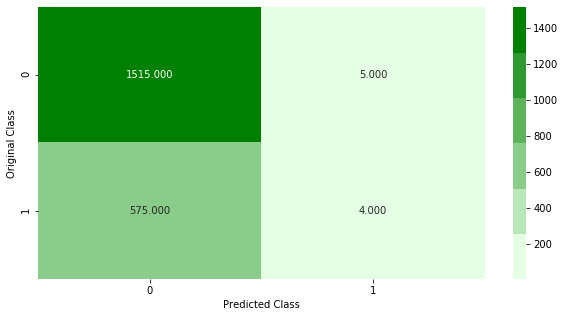

__________________________________________________ Precision Matrix __________________________________________________


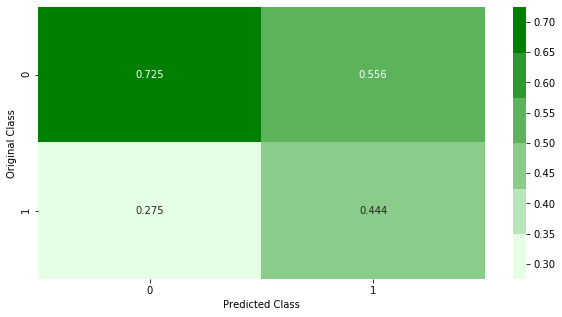

Sum of columns in precision matrix [1. 1.]
__________________________________________________ Recall Matrix __________________________________________________


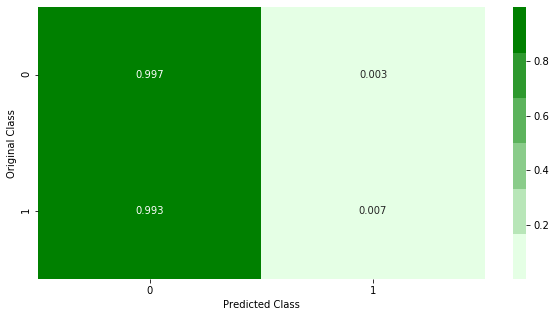

Sum of rows in recall matrix [1. 1.]


In [0]:
plot_confusion_matrix(Y_test, lr_roc_auc.predict(X_test))

Number of misclassified points 27.584564078132445
__________________________________________________ Confusion Matrix __________________________________________________


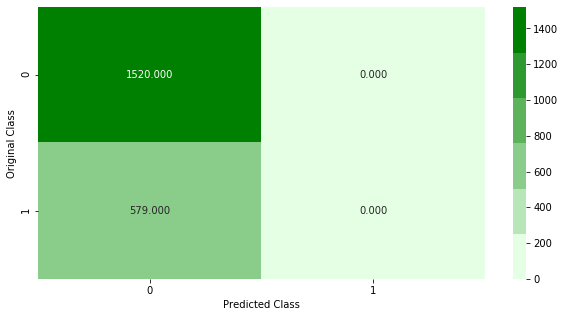

__________________________________________________ Precision Matrix __________________________________________________


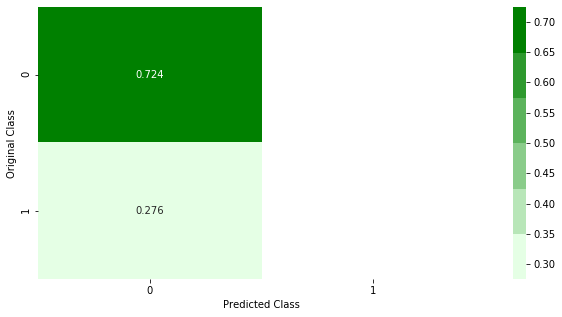

Sum of columns in precision matrix [ 1. nan]
__________________________________________________ Recall Matrix __________________________________________________


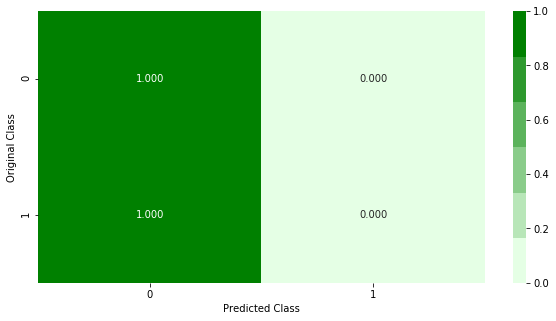

Sum of rows in recall matrix [1. 1.]


In [0]:
plot_confusion_matrix(Y_test, lr.predict(X_test))